# Aprendizado de Máquina: Modelos de imagem

## Autor
**Nome**: Pedro Lucas Cassiano Martins<br>
**Matrícula**: 190036567<br>
**Github**: [PedroLucasCM](github.com/PedroLucasCM)

## Resumo
<p>O aprendizado de Máquina vem crescendo muito no mercado desde a última decada e é uma área da computação/informática muito estudada também, por isso estamos estudando essa área no curso de Engenharia de Software na Faculdade do Gama da Universidade de Brasília.</p>
<p>Esse artigo foi criado no intuito de continuar este estudo ao estudar qual modelo de imagem é o melhor para diferenciação de imagens para cada situação e como foco explicar como as redes neurais funcionam do básico até sua implementação pelo *fastai* e concluimos que [...] .</p>

**O estudo é majoritariamente baseado no curso "_fast.ai_" de Jeremy Howard, mencionado na blibliografia desse artigo.**

## Objetivo
<p>O objetivo deste artigo é o de estudar modelos de imagem para saber os melhores para cada situação, além de também simular redes neurais com funções quadráticas e retificadoras.</p>


## Atualização e Imports

In [2]:
#|export
import os
import warnings

# Código para ignorar avisos de usuário
warnings.filterwarnings("ignore", category=UserWarning)

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai
    !pip install -Uqq ipywidgets
    !pip install -Uqq fastbook
    !pip install -Uqq timm

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastbook 0.0.29 requires ipywidgets<8, but you have ipywidgets 8.0.6 which is incompatible.


In [3]:
from fastai.vision.widgets import *
from ipywidgets import interact
from fastai.basics import *
from fastbook import *
import timm

## Modelos de imagens

A Lição 3 começa mostrando os diferentes modelos de imagens pelo notebook [Which image models are best?](https://www.kaggle.com/code/jhoward/which-image-models-are-best/) e lá podemos ver um gráfico 2D sendo o eixo Y a eficiência e o eixo X o tempo, em segundos, que leva para treinar o modelo. A Figura 1 mostra o gráfico com os diferentes modelos representados como bolhas, ao passar o cursor do mouse por cima podemos ver os nomes de cada modelo e alguns detalhes.
<p style='text-align:center'>Figura 1: Gráfico dos modelos</p>
<p style='text-align:center'><img src='assets/grfico_model.png' width='480px' height='480px'></p>

Assim, poderemos ver quais são os modelos mais potentes e os mais rápidos e analisamos mais podemos ver que quanto mais potente mais lento eles são.
Depois de uma análise, vemos que o modelo resnet18, que foi usado nos 2 primeiros artigos para treino do modelo, está lá embaixo como mostra a Figura 2.
<p style='text-align:center'>Figura 2: Gráfico do modelo resnet18</p>
<p style='text-align:center'><img src='assets/resnet18.PNG' width='480px' height='480px'></p>

E além dele, um dos modelos que chamaram mais atenção foi o '*convnext_tiny*' que como mostra a Figura 3 está lá em cima com muita potência e com uma velociadde de 0.001 segundos.
<p style='text-align:center'>Figura 3: Gráfico do modelo convenxt_tiny</p>
<p style='text-align:center'><img src='assets/convenxt_tiny.PNG' width='480px' height='480px'></p>

Pegaremos então esse modelo convnext para comparação com o resnet18. Mas como fazer isso?
Com a biblioteca *timm* podemos listar os modelos disponíveis pelo pytorch e pegar um deles.

In [4]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

Para testar a diferença em eficácia do resnet18 para o convnext_tiny_in22k, vamos treinar um modelo usando ambos.
O dataset utilizado foi de autoria própria, da [lição 02](https://www.kaggle.com/code/pedrocassiano/lesson2-pedrolucascm/notebook?scriptVersionId=128070085), que contém imagens de cadeiras e mesas para diferenciação.

In [5]:
path = '/kaggle/input/c-or-t/chair_or_table'
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(360, method='squish')]
).dataloaders(path, bs=32)

Agora podemos fazer o treino com cada modelo.
Utilizaremos 3 instâncias em cada para ser mais rápido

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 257MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.099757,1.115262,0.293103,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.335929,0.522933,0.172414,00:02
1,0.185518,0.611523,0.172414,00:02
2,0.123972,0.685195,0.155172,00:02


Como podemos ver, o resnet18 teve um train_loss de 12,4%, um valid_loss de 68,5% e uma taxa de erro de 15,5% em um tempo de 3 segundos (valores aproximados).

In [7]:
learnc = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate)
learnc.fine_tune(3)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_22k_224.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.726750,0.254412,0.086207,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.057453,0.153885,0.051724,00:08
1,0.051397,0.139565,0.068966,00:08
2,0.041964,0.145739,0.068966,00:08


Como podemos ver, o convnext_tiny_in22k teve um train_loss de 4,2%, um valid_loss de 14,6% e uma taxa de erro de 6,9% em um tempo de 8 segundos(valores aproximados). Concluindo que ele é um modelo superior ao resnet18 em termos de precisão.

# As Redes neurais
## Gradient descent
Uma rede neural nada mais é do que uma função matemática. Em uma rede neural típica, a função:

1. Multiplica cada entrada por um conjunto de valores. Esses valores são chamados de parâmetros;
2. Os soma para cada grupo de valores;
3. Substitui os valores negativos por 0

Esse processo representa uma camada. Esses passos são então repetidos, usando a saída da camada anterior como entrada da próxima.

Os parâmetros inicias são aleatórios, então para a função ser capaz de aprender algo útil, devemos melhorar os parâmetros de alguma forma, é aí que entra o *método do gradiente (gradient descent)*.

In [8]:
plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

Para explorar a matemática por trás das redes neurais de forma interativa, serão usadas algumas bibliotecas e funções do Python.

Para aprender sobre gradient descent, vamos começar com uma função quadrática:

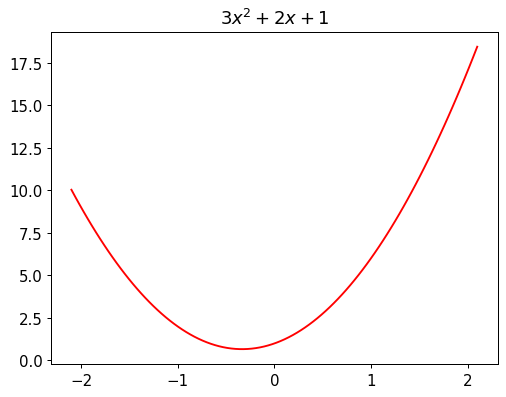

In [9]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

Nossa função quadrática tem 3 parâmetros: 
1. **a=3**
2. **b=2**
3. **c=1**

Podemos criar uma função para calcular o valor do ponto em qualquer quadrática, e então outra função para fixar os valores de a, b, c que passarmos:

In [10]:
def quad(a,b,c,x): return a*x**2 + b*x + c
def mk_quad(a,b,c): return partial(quad, a,b,c)

Pronto, agora podemos criar qualquer quadrática facilmente. Podemos então simular ruído nas medidas da função f, e usar o gradient descent para tentar recriar a função original.

In [11]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

A função np.random.normal() pega amostras aleatórias de uma distribuição normal (Gaussiana) Então realizamos os 3 passos para criar uma camada através da função add_noise().

In [12]:
np.random.seed(42)
x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

A função *torch.linspace(start, end, steps)* cria um tensor unidimensional que começa em *start*, termina em *end*, e é dividido em espaços iguais na quantidade de *steps*.

Um tensor pode ser um único número (tensor rank 0), uma lista de números (tensor rank 1), uma tabela de números (tensor rank 2), uma tabela de tabelas de números (tensor rank 3), e etc.

Podemos fazer um scatter plot para visualizar nossos dados:

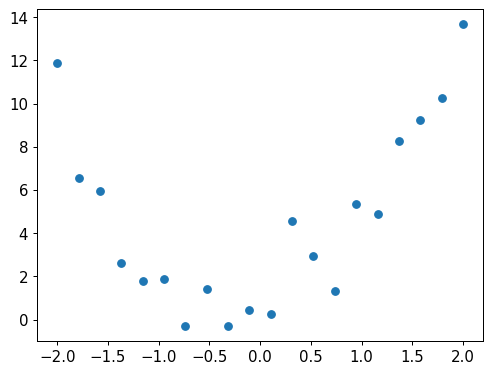

In [13]:
plt.scatter(x,y);

Como encontrar os valores de a, b, c que se encaixam nos dados? Uma alternativa é alterá-los manualmente e podemos fazer isso com o *@interact* que cria um slider para cada variável.

In [14]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

Ajustando os valores, a melhor combinação que encontramos foi:<br>
**a=2.60<br>
b=1.40<br>
c=0.90**<br>

Uma desvantagem desse método é que temos que nos basear em nosso julgamento se o fit da função está melhorando ou piorando com cada alteração, mas podemos adicionar um valor numérico para nos basearmos, o erro médio absoluto, que é a distância de cada ponto para a curva.

In [15]:
def ema(preds, acts): return (torch.abs(preds-acts)).mean()

In [16]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = ema(f(x), y)
    plot_function(f, ylim=(-3,12), title=f'EMA: {loss:.2f}')

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

Através do EMA, o melhor conjunto de valores foi:<br>
**a=2.70<br>
b=1.20<br>
c=0.50**<br>

Uma rede neural moderna tem milhões de parâmetros para ajustar, e milhares de pontos de dados. Não é possível realizar tudo isso à mão, mas podemos automatizar o processo.

# Automatização
A ideia é saber o efeito da alteração de cada parâmetro no EMA, então encontramos o gradiente do EMA para cada parâmetro, e os ajustamos na direção oposta.

In [17]:
def quad_ema(params):
    f = mk_quad(*params)
    return ema(f(x), y)

Essa função calcula o EMA pra um conjunto de valores qualquer, então podemos selecionar um conjunto de valores de a,b,c para colocar em um tensor, e em seguida explicitar ao PyTorch que vamos calcular gradientes para cada parâmetro:

In [18]:
abc = torch.tensor([1.1, 1.1, 1.1])
abc.requires_grad_()

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

Podemos então calcular o EMA. Geralmente no gradient descent a coisa minimizada é chamada de perda (loss).

In [19]:
loss = quad_ema(abc)
loss

tensor(2.4219, dtype=torch.float64, grad_fn=<MeanBackward0>)

Vamos calcular os gradientes através da função *backward()*, e eles ficam guardados na variável *grad*.

In [20]:
loss.backward()
abc.grad

tensor([-1.3529, -0.0316, -0.5000])

De acordo com os gradientes devemos aumentar os parâmetros, então podemos subtrair o gradiente multiplicado por um número pequeno para atingir o resultado desejado:

In [21]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_ema(abc)
    
print(f'loss={loss:.2f}')

loss=2.40


O pequeno número utilizado na multiplicação é chamado de **taxa de aprendizado**, e é crucial no treinamento de uma rede neural.

Podemos repetir o processo para reduzir mais o erro:

In [22]:
for i in range(10):
    loss = quad_ema(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=2.40
step=1; loss=2.36
step=2; loss=2.30
step=3; loss=2.21
step=4; loss=2.11
step=5; loss=1.98
step=6; loss=1.85
step=7; loss=1.72
step=8; loss=1.58
step=9; loss=1.46


Eventualmente o valor do erro vai começar a subir, pois os valores dos parâmetros vão superar os corretos. Para isso precisamos diminuir a taxa de aprendizado enquanto treinamos. Isso é feito usando uma rotina de taxa de aprendizado, e pode ser automatizada pelo seu framework, como o fastai.

# Retificadores
Redes neurais são muito mais complexas do que nosso exemplo, porque são capazes de aproximar qualquer função computável desde que possuam parâmetros o suficiente. Isso as torna capazes de entender e traduzir a fala humana, fazer uma pintura/arte, escrever textos, e muito mais.

Para aproximar uma função precisamos combinar dois passos:

1. Multiplicação de matrizes
2. A função max(x,0), que troca todos números negativos para 0.

No PyTorch, a função equivalente à max(x,0) é a np.clip(x,0).

A combinação desses passos se chama função retificada linear e tem a seguinte implementação:

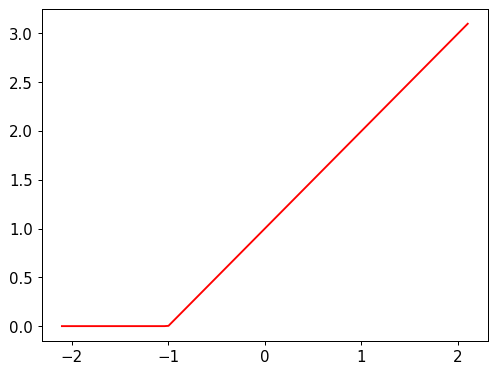

In [23]:
def rectified_linear(m,b,x):
    y = m*x+b
    return torch.clip(y, 0.)

plot_function(partial(rectified_linear, 1,1))

Sozinha a função não faz muito, mas quando somamos duas:

In [24]:
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
    plot_function(partial(double_relu, m1,b1,m2,b2), ylim=(-1,6))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…

É possível perceber que com uma quantidade suficiente de funções somadas, seríamos capazes de aproximar qualquer função com uma única entrada.

Portanto, a diferença entre os experimentos realizados aqui e uma rede neural funcional é a quantidade de tempo e dados fornecidos.

# Conclusão

A resnet18 é uma excelente ferramenta para treinar um modelo rapidamente, mas existem vários modelos de imagem que possuem uma acurácia maior, e vale a pena experimentar com alguns deles antes da decisão final.

Redes neurais é um assunto complexo, mas pode ser quebrado em passos pequenos, assim se tornando compreensível.